**purpose**: collect free data useful for gauging economy

# manual setup

In [ ]:
%env QUANDL_API_KEY=
%env OPENFEC_API_KEY=
%env ALPHAVANTAGE_API_KEY=
%env FRED_API_KEY=
%env ENIGMA_API_KEY=


# pandas datareader

In [18]:
import os
import datetime
import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas_datareader import wb
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.tsp as tsp
import matplotlib

In [3]:
# define timeframe
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.today()

In [2]:
# FRED
# https://fred.stlouisfed.org/
gdp = web.DataReader('GDP', 'fred', start, end)

In [24]:
# Quandl
# https://docs.data.nasdaq.com/docs/getting-started
symbol = 'WIKI/AAPL'
aapl = web.DataReader(symbol, 'quandl', start, end)

In [41]:
# alpha vantage
# https://www.alphavantage.co/documentation/
usd_jpy = web.DataReader("USD/JPY", "av-forex", api_key=os.getenv('ALPHAVANTAGE_API_KEY'))

In [36]:
web.get_sector_performance_av().head()

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Energy,2.45%,2.44%,5.22%,17.51%,15.17%,16.38%,50.76%,7.35%,-10.05%,-5.84%
Information Technology,0.89%,0.89%,-0.06%,-3.61%,9.58%,-4.75%,27.38%,160.88%,248.93%,NaN
Communication Services,0.53%,0.53%,0.52%,-1.01%,-2.00%,-2.18%,21.75%,77.92%,51.54%,NaN
Consumer Staples,0.19%,0.19%,-0.42%,3.04%,10.49%,-0.04%,17.86%,51.67%,51.98%,NaN
Health Care,-0.17%,-0.17%,-0.28%,-1.06%,6.82%,-4.92%,14.58%,53.65%,90.73%,281.22%


In [39]:
# econdb
# https://www.econdb.com/main-indicators?country=US&freq=Q&mode=country-profile
us_cpi = web.DataReader('ticker=CPIUS', 'econdb', start, end)

In [45]:
# enigma
# https://enigma.com/our-data
# for now doesn't work
# usda_food_recals = pdr.get_data_enigma('292129b0-1275-44c8-a6a3-2a0881f24fe1', os.getenv('ENIGMA_API_KEY'))

In [24]:
# fama/french
# https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
ds = web.DataReader('5_Industry_Portfolios', 'famafrench', start, end)

In [25]:
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202111 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (1145 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (1145 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (94 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (94 rows x 5 cols)
  4 : Number of Firms in Portfolios (1145 rows x 5 cols)
  5 : Average Firm Size (1145 rows x 5 cols)
  6 : Sum of BE / Sum of ME (96 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (96 rows x 5 cols)


In [26]:
ds

{0:          Cnsmr  Manuf  HiTec  Hlth   Other
 Date                                      
 1926-07   5.43   2.73   1.83   1.77   2.13
 1926-08   2.76   2.33   2.41   4.25   4.35
 1926-09   2.16  -0.44   1.06   0.69   0.29
 1926-10  -3.90  -2.42  -2.26  -0.57  -2.84
 1926-11   3.70   2.50   3.07   5.42   2.11
 ...        ...    ...    ...    ...    ...
 2021-07   0.11  -0.10   3.14   3.15  -0.38
 2021-08   1.70   0.77   4.39   2.85   2.48
 2021-09  -3.29  -2.96  -6.21  -5.94  -2.35
 2021-10   8.55   5.94   6.63   2.32   7.07
 2021-11   0.46  -1.80   0.30  -4.18  -4.97
 
 [1145 rows x 5 columns],
 1:          Cnsmr  Manuf  HiTec  Hlth   Other
 Date                                      
 1926-07   1.68   1.42   2.01   2.45   0.11
 1926-08   2.73   2.27   2.27   6.11   4.49
 1926-09  -0.89  -0.33   0.72   0.80  -0.61
 1926-10  -4.25  -2.92  -4.70   0.13  -2.61
 1926-11   3.46   2.09   1.36   7.20   0.92
 ...        ...    ...    ...    ...    ...
 2021-07  -3.51  -3.92  -2.73  -8.67  -2.2

In [3]:
len(get_available_datasets())

297

In [51]:
# world bank
# https://data.worldbank.org/
matches = wb.search('gdp.*capita.*const')

In [52]:
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10384,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10386,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10388,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10389,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [53]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=start, end=end)

In [54]:
dat

NY.GDP.PCAP.KD
country       year                
Canada        2020    42108.174528
              2019    44958.088687
              2018    44765.502511
              2017    44325.416776
              2016    43536.913403
...                            ...
United States 1964    21599.818705
              1963    20701.269947
              1962    20116.235124
              1961    19253.547329
              1960    19135.268182

[183 rows x 1 columns]

In [71]:
wb.search('oil.*').iloc[:,:2]

,id,name
56,110115,110115:Oils and fats (Class)
57,1101150,1101150:Oils and fats
2066,CC.EG.CONS.OIL.PC,Per capita daily oil consumption (barrels per ...
2121,CC.GAS.PPBC.CN,Gas pipeline capacity by project status (barre...
2122,CC.GAS.PPBC.CO,Gas pipeline capacity by project status (barre...
...,...,...
11573,SE.PRM.INFR.3.U,(De Facto) Percent of schools with functioning...
11602,SE.PRM.ISTD.11,(De Jure) Is there a policy in place to requir...
11603,SE.PRM.ISTD.12,(De Facto) Do you know if there is a policy in...
14137,TRAD.EXPT.OLFTW,"Export: Animals and vegetable oil, fat and wax..."


In [77]:
ind = ['NY.GDP.PCAP.KD', 'CC.EG.CONS.OIL.PC']
dat = wb.download(indicator='CC.EG.CONS.OIL.PC', country=['US', 'CA'], start=start, end=end).dropna()
#dat.columns = ['gdp', 'cellphone']
print(dat.tail())

                    CC.EG.CONS.OIL.PC
country       year                   
United States 1984           0.066681
              1983           0.065146
              1982           0.066023
              1981           0.069976
              1980           0.075059


In [22]:
# OECD
# https://stats.oecd.org/
df = web.DataReader('TUD', 'oecd', start, end)
df.columns

MultiIndex([(      'Australia', 'Annual', 'Percentage of employees'),
            (        'Austria', 'Annual', 'Percentage of employees'),
            (        'Belgium', 'Annual', 'Percentage of employees'),
            (         'Canada', 'Annual', 'Percentage of employees'),
            ( 'Czech Republic', 'Annual', 'Percentage of employees'),
            (        'Denmark', 'Annual', 'Percentage of employees'),
            (        'Finland', 'Annual', 'Percentage of employees'),
            (         'France', 'Annual', 'Percentage of employees'),
            (        'Germany', 'Annual', 'Percentage of employees'),
            (         'Greece', 'Annual', 'Percentage of employees'),
            (        'Hungary', 'Annual', 'Percentage of employees'),
            (        'Iceland', 'Annual', 'Percentage of employees'),
            (        'Ireland', 'Annual', 'Percentage of employees'),
            (          'Italy', 'Annual', 'Percentage of employees'),
            (       

In [23]:
df[['Japan', 'United States']]

Country,Japan,United States
Frequency,Annual,Annual
Measure,Percentage of employees,Percentage of employees
Time,,
1960-01-01,32.299999,30.900000
1961-01-01,33.700001,29.500000
1962-01-01,34.599998,27.600000
1963-01-01,35.000000,28.500000
1964-01-01,35.500000,28.299999
...,...,...
2016-01-01,17.000000,10.100000


In [21]:
# Eurostat
# https://ec.europa.eu/eurostat/
df = web.DataReader('tran_sf_railac', 'eurostat',start,end)
df

UNIT                                                                                      Number  \
ACCIDENT    Collisions of trains, including collisions with obstacles within the clearance gauge   
GEO                                                                                      Austria   
FREQ                                                                                      Annual   
TIME_PERIOD                                                                                        
2006-01-01                                                 2.0                                     
2007-01-01                                                 4.0                                     
2008-01-01                                                 3.0                                     
2009-01-01                                                 5.0                                     
2010-01-01                                                 3.0                                     
2011-01-01                                                 2.0                                     
2012-01-01                                                 1.0                                     
2013-01-01                                                 4.0                                     
2014-01-01                                                 1.0                                     
2015-01-01                                                 7.0                                     
2016-01-01                                                 7.0                                     
2017-01-01                                                 7.0                                     
2018-01-01                                                 4.0                                     
2019-01-01                                                 1.0                                     
2020-01-01                                                 2.0                                     

UNIT                                                             \
ACCIDENT                                                          
GEO         Belgium Bulgaria Switzerland Channel Tunnel Czechia   
FREQ         Annual   Annual      Annual         Annual  Annual   
TIME_PERIOD                                                       
2006-01-01     84.0      0.0         NaN            NaN    13.0   
2007-01-01     77.0      3.0         NaN            0.0     3.0   
2008-01-01     94.0      3.0         NaN            0.0     5.0   
2009-01-01     34.0      3.0         5.0            0.0     5.0   
2010-01-01      5.0      2.0         5.0            0.0     3.0   
2011-01-01      0.0      0.0         4.0            0.0     6.0   
2012-01-01      3.0      3.0         4.0            0.0     6.0   
2013-01-01      1.0      2.0         6.0            0.0     5.0   
2014-01-01      3.0      4.0         0.0            0.0    13.0   
2015-01-01      0.0      3.0         3.0            0.0    14.0   
2016-01-01      2.0      3.0         2.0            0.0     6.0   
2017-01-01      1.0      1.0         3.0            0.0    11.0   
2018-01-01      0.0      1.0         3.0            0.0     6.0   
2019-01-01      2.0      4.0         4.0            0.0     7.0   
2020-01-01      1.0      1.0         4.0            0.0    11.0   

UNIT                                                                          \
ACCIDENT                                                                       
GEO         Germany (until 1990 former territory of the FRG) Denmark Estonia   
FREQ                                                  Annual  Annual  Annual   
TIME_PERIOD                                                                    
2006-01-01                                             422.0     1.0     NaN   
2007-01-01                                              15.0     0.0     0.0   
2008-01-01                                              13.0     0.0     0.0   
2009-01-01        

In [5]:
# Thrift Savings Plan (TSP)
# https://www.tsp.gov/
tspreader = tsp.TSPReader(start=start, end=end)
tspreader.read()

,L Income,L 2025,L 2030,L 2035,L 2040,L 2045,L 2050,L 2055,L 2060,L 2065,G Fund,F Fund,C Fund,S Fund,I Fund
Date,,,,,,,,,,,,,,,
2022-01-14,23.3722,12.1416,43.0512,12.9488,49.0770,13.4585,29.5242,14.6039,14.6037,14.6034,16.7465,20.5224,70.4269,78.9942,39.4062
2022-01-13,23.3872,12.1536,43.1066,12.9672,49.1526,13.4809,29.5756,14.6278,14.6276,14.6274,16.7458,20.6320,70.3676,79.1299,39.6076
2022-01-12,23.4428,12.2080,43.3790,13.0573,49.5249,13.5903,29.8319,14.7839,14.7837,14.7834,16.7451,20.5971,71.3758,80.4874,39.7338
2022-01-11,23.4227,12.1893,43.2877,13.0274,49.4026,13.5548,29.7495,14.7344,14.7341,14.7339,16.7444,20.6036,71.1743,80.9330,39.4203
2022-01-10,23.3599,12.1308,42.9995,12.9322,49.0099,13.4394,29.4799,14.5752,14.5749,14.5747,16.7437,20.5667,70.5284,79.7575,38.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-06-06,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0000,10.0000,10.2500,10.2500,10.3700
2003-06-05,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0000,10.0000,10.2700,10.3000,10.2800
2003-06-04,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0000,10.0200,10.2300,10.2000,10.1800


In [6]:
# NASDAQ Symbols
# https://www.nasdaqtrader.com/trader.aspx?id=symboldirdefs
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()

In [12]:
symbols.loc['FB']

Nasdaq Traded                                              True
Security Name       Meta Platforms, Inc. - Class A Common Stock
Listing Exchange                                              Q
Market Category                                               Q
ETF                                                       False
Round Lot Size                                            100.0
Test Issue                                                False
Financial Status                                              N
CQS Symbol                                                  NaN
NASDAQ Symbol                                                FB
NextShares                                                False
Name: FB, dtype: object

In [14]:
# stooq 
# https://stooq.com/
dji = web.DataReader('^DJI', 'stooq', start, end)
dji

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-14,35996.43,35996.43,35641.49,35911.81,439486364.0
2022-01-13,36312.49,36513.88,36044.22,36113.62,395636110.0
2022-01-12,36336.16,36453.49,36168.15,36290.32,361798146.0
2022-01-11,36058.85,36271.47,35769.38,36252.02,421210623.0
2022-01-10,36175.21,36175.21,35639.91,36068.87,488023456.0
...,...,...,...,...,...
1900-01-08,48.10,48.10,48.10,48.10,NaN
1900-01-05,48.31,48.31,48.31,48.31,NaN
1900-01-04,48.63,48.63,48.63,48.63,NaN


In [15]:
# moex
# https://www.moex.com/ru/data/

imoex = pdr.get_data_moex(['IMOEX'], start, end)
imoex

,BOARDID,SECID,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR,TRADINGSESSION,VOLUME
TRADEDATE,,,,,,,,,,,,,,,,,
1997-09-22,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,100.00,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,RUB,NaN,3,NaN
1997-09-23,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,100.67,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,RUB,NaN,3,NaN
1997-09-24,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,99.94,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,RUB,NaN,3,NaN
1997-09-25,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,99.46,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,RUB,NaN,3,NaN
1997-09-26,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,98.87,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,RUB,NaN,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,3829.95,3797.31,3841.72,3783.92,1.008653e+11,0.0,0.0,2,1.893850e+13,RUB,4.944847e+09,3,NaN
2022-01-13,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,3674.73,3814.98,3818.97,3664.48,1.787708e+11,0.0,0.0,2,1.817096e+13,RUB,4.944847e+09,3,NaN
2022-01-14,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,3596.98,3703.90,3723.62,3512.03,2.534106e+11,0.0,0.0,2,1.778651e+13,RUB,4.944847e+09,3,NaN


<AxesSubplot:xlabel='TRADEDATE'>

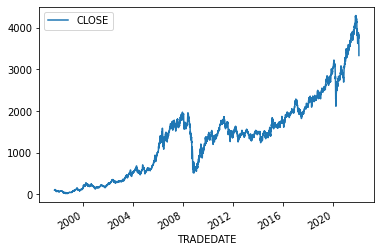

In [19]:
imoex[['CLOSE']].plot()

In [21]:
# naver: korean stock market - KOSPI, KOSDAQ
# https://finance.naver.com/
df = web.DataReader('005930', 'naver', start=start, end=end)

<AxesSubplot:xlabel='Date'>

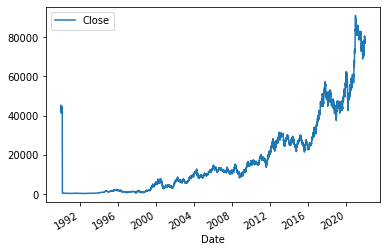

In [29]:
df[['Close']].astype('float').plot()

In [31]:
# yahoo
# https://finance.yahoo.com/
ge = web.DataReader('GE', 'yahoo', start=start, end=end)
ge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1962-01-02,6.109776,5.949519,6.009615,5.989583,269568.0,1.011788
1962-01-03,5.959535,5.909455,5.959535,5.929487,184704.0,1.001636
1962-01-04,5.979567,5.809295,5.929487,5.859375,229632.0,0.989793
1962-01-05,5.869391,5.608974,5.859375,5.709135,340704.0,0.964413
1962-01-08,5.709135,5.528846,5.709135,5.699119,386880.0,0.962722
...,...,...,...,...,...,...
2022-01-11,102.370003,99.970001,100.290001,101.790001,5673900.0,101.790001
2022-01-12,102.620003,101.379997,101.430000,102.239998,4558500.0,102.239998
2022-01-13,103.650002,101.800003,102.290001,102.459999,4382500.0,102.459999


# US Federal Election Commission: openFEC

# US Federal Reserve Economic Data: FRED

In [2]:
from fredapi import Fred
fred = Fred(api_key=FRED_API_KEY)
data = fred.get_series('SP500')


In [4]:
data = fred.get_series('GDP')
data

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2020-07-01    21138.574
2020-10-01    21477.597
2021-01-01    22038.226
2021-04-01    22740.959
2021-07-01    23202.344
Length: 303, dtype: float64

In [11]:
fred.search('ratio')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
EMRATIO,EMRATIO,2022-01-15,2022-01-15,Employment-Population Ratio,1948-01-01,2021-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-01-07 07:44:07-06:00,72,The series comes from the 'Current Population ...
LNU02300000,LNU02300000,2022-01-15,2022-01-15,Employment-Population Ratio,1948-01-01,2021-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-01-07 07:46:12-06:00,33,The series comes from the 'Current Population ...
LNS12300060,LNS12300060,2022-01-15,2022-01-15,Employment-Population Ratio - 25-54 Yrs.,1948-01-01,2021-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-01-07 07:44:21-06:00,64,None
ISRATIO,ISRATIO,2022-01-15,2022-01-15,Total Business: Inventories to Sales Ratio,1992-01-01,2021-11-01,"Monthly, End of Period",M,Ratio,Ratio,Seasonally Adjusted,SA,2022-01-14 09:01:02-06:00,69,"Effective June 14, 2001, data were reconstruct..."
RETAILIRSA,RETAILIRSA,2022-01-15,2022-01-15,Retailers: Inventories to Sales Ratio,1992-01-01,2021-11-01,"Monthly, End of Period",M,Ratio,Ratio,Seasonally Adjusted,SA,2022-01-14 09:01:05-06:00,68,The inventories to sales ratios show the relat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LREM64FEPLQ156S,LREM64FEPLQ156S,2022-01-15,2022-01-15,Employment Rate: Aged 15-64: Females for Poland,2000-01-01,2021-04-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2021-10-13 14:39:46-05:00,1,OECD descriptor ID: LREM64FE OECD unit ID: STS...
LREM64FEPLQ156N,LREM64FEPLQ156N,2022-01-15,2022-01-15,Employment Rate: Aged 15-64: Females for Poland,1999-01-01,2021-04-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2021-10-13 14:39:46-05:00,1,OECD descriptor ID: LREM64FE OECD unit ID: ST ...
LREM64FEPLA156N,LREM64FEPLA156N,2022-01-15,2022-01-15,Employment Rate: Aged 15-64: Females for Poland,2000-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-04-16 12:26:01-05:00,1,OECD descriptor ID: LREM64FE OECD unit ID: ST ...
